## 1. Import the required libraries and load the data:

#### Load the required libraries and read the dataset

In [130]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#### Load the data:

In [131]:
# Import dataset
df = pd.read_csv("renttherunway.csv") #reading the provided dataset
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


#### Check the first few samples, shape, info of the data.

In [132]:
#Shape of the dataset
shape = df.shape
shape

(192544, 16)

In [133]:
#Size of the dataset
size = df.size
size

3080704

In [134]:
#Lets check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

- The dataset has 192544 entries and 16 columns
- Except user_id, item_id, size, rating and age column rest every column is object type
- Unnamed: 0 is a column which holds the serial number of records and its datatype is int.

# 2. Data cleansing and Exploratory data analysis:

#### Check if there are any duplicate records in the dataset? If any drop them.

In [135]:
len(df[df.duplicated()]) #checking for any duplicate rows

0

- Since there are no duplicate records in the dataset so there is no need to drop any values.

#### Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [136]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('user_id',axis=1)
df = df.drop('item_id',axis=1)
df = df.drop('review_text',axis=1)
df = df.drop('review_summary',axis=1)
df = df.drop('review_date',axis=1)
df #dataset without columns - Unnamed: 0, user_id, item_id, review_text, review_summary, review_date

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


#### Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [137]:
# Replacing lbs in weight
df['weight'] = df['weight'].str.replace('lbs','')
# Replacing NaN values with 0 in column weight
df['weight'] = df['weight'].fillna(0)
# Converting feature 'weight' as float
df['weight'] = df['weight'].astype(float).round(2)
df.info() #Displays changed datatype of 'weight' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 14.7+ MB


In [138]:
# Extracting only first 2 digits in column bust size
df['bust size'] = df['bust size'].str[:2]
# Replacing NaN values with 0 in column bust size
df['bust size'] = df['bust size'].fillna(0)
# Converting feature 'bust size' as float
df['bust size'] = df['bust size'].astype(float).round(2)
df.info() #Displays changed datatype of 'bust size' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  float64
 2   weight      192544 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


#### Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [140]:
df['rented for'].value_counts().index.tolist() #printing unique categories of column "rented for"

['wedding',
 'formal affair',
 'party',
 'everyday',
 'other',
 'work',
 'date',
 'vacation',
 'party: cocktail']

In [141]:
df['rented for'] = df['rented for'].str.replace('party: cocktail','party')
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34.0,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34.0,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,0.0,0.0,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34.0,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34.0,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34.0,140.0,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32.0,100.0,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36.0,135.0,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36.0,165.0,10.0,wedding,pear,dress,"5' 6""",16,31.0


#### The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [142]:
df['height'] = df['height'].str.replace('"','') #Replacing '"' in column height
df['height'] = df['height'].fillna(0) # Replacing NaN values with 0 in column height
def parse_ht(ht):
    ht = str(ht)
    ht_ = ht.split("' ")
    length = len(ht_)
    ft_ = float(ht_[0])
    if length>1:
        in_ = float(ht_[1])
    else:
        in_ = 0
    return (12*ft_) + in_

df['height'] = df['height'].apply(parse_ht)

In [143]:
df #displaying data after converting values of column height to inches

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34.0,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34.0,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,0.0,0.0,10.0,party,NaN,sheath,64.0,4,116.0
3,fit,34.0,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34.0,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34.0,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,32.0,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,36.0,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,36.0,165.0,10.0,wedding,pear,dress,66.0,16,31.0


In [144]:
df.info() #to display the datatype of column height is float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  float64
 2   weight      192544 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 14.7+ MB


#### Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [145]:
df.isnull().sum() # Checking null values

fit               0
bust size         0
weight            0
rating           82
rented for       10
body type     14637
category          0
height            0
size              0
age             960
dtype: int64

In [146]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #Replacing missing values in all columns with the most common class.


In [147]:
df.isnull().sum() #Displays all null values have been handled.Hence the sum of null values in all columns are 0.

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

#### Check the statistical summary for the numerical and categorical columns and write your findings.

In [148]:
#Checking the statistical summary 
df.describe()

,bust size,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,30.930956,115.997751,9.092758,65.080984,12.245175,33.856703
std,10.193583,53.726993,1.429862,4.691938,8.494877,8.040513
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,32.000000,115.000000,8.000000,63.000000,8.000000,29.000000
50%,34.000000,130.000000,10.000000,65.000000,12.000000,32.000000
75%,36.000000,145.000000,10.000000,67.000000,16.000000,37.000000
max,48.000000,300.000000,10.000000,78.000000,58.000000,117.000000


- There are outliers in column weight, size and age and it needs to be handled.

#### Is there outliers present in the column age? If yes treat them with appropriate method.

In [149]:
#User defined function to replace outliers using imputation as if they were missing values
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))

    return df

In [150]:
#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['weight'] = impute_outliers_IQR(df['weight'])
df['size'] = impute_outliers_IQR(df['size'])
df['age'] = impute_outliers_IQR(df['age'])

In [151]:
df.describe() #showing statistical summary after handling outliers

,bust size,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,30.930956,132.147905,9.092758,65.080984,11.360347,32.718909
std,10.193583,18.261196,1.429862,4.691938,6.763113,5.912746
min,0.000000,70.000000,2.000000,0.000000,0.000000,17.000000
25%,32.000000,115.997751,8.000000,63.000000,8.000000,29.000000
50%,34.000000,130.000000,10.000000,65.000000,12.000000,32.000000
75%,36.000000,145.000000,10.000000,67.000000,16.000000,36.000000
max,48.000000,190.000000,10.000000,78.000000,28.000000,49.000000


#### Check the distribution of the different categories in the column 'rented for' using appropriate plot.

<AxesSubplot:xlabel='rented for', ylabel='count'>

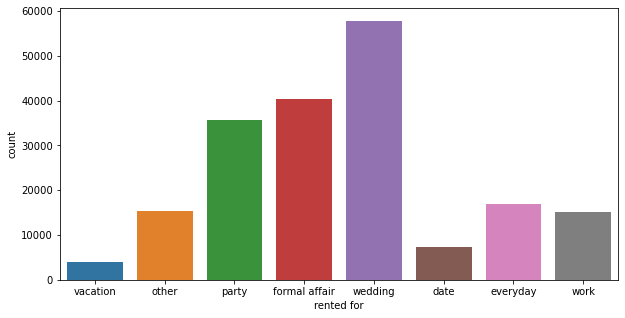

In [152]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['rented for'] , data = df)

- Most of the clothes have been rented for the purpose of wedding
- The least number of clothes were rented for vacation

# 3. Data Preparation for model building:

#### Encode the categorical variables in the dataset.

In [153]:
### Categorical features in the dataset
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['fit', 'rented for', 'body type', 'category'], dtype='object')

In [154]:
#Encoding using one hot encoding
dummies = pd.get_dummies(df["fit"])
df1 = pd.concat([df,dummies],axis=1)

dummies = pd.get_dummies(df1["rented for"])
df2 = pd.concat([df1,dummies],axis=1)

dummies = pd.get_dummies(df2["body type"])
df3 = pd.concat([df2,dummies],axis=1)

dummies = pd.get_dummies(df3["category"])
df4 = pd.concat([df3,dummies],axis=1)

In [155]:
df4

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
0,fit,34.0,137.000000,10.0,vacation,hourglass,romper,68.0,14.0,28.000000,...,0,0,0,0,0,0,0,0,0,0
1,fit,34.0,132.000000,10.0,other,straight & narrow,gown,66.0,12.0,36.000000,...,0,0,0,0,0,0,0,0,0,0
2,fit,0.0,115.997751,10.0,party,hourglass,sheath,64.0,4.0,33.856703,...,0,0,0,0,0,0,0,0,0,0
3,fit,34.0,135.000000,8.0,formal affair,pear,dress,65.0,8.0,34.000000,...,0,0,0,0,0,0,0,0,0,0
4,fit,34.0,145.000000,10.0,wedding,athletic,gown,69.0,12.0,27.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34.0,140.000000,10.0,work,hourglass,jumpsuit,69.0,8.0,42.000000,...,0,0,0,0,0,0,0,0,0,0
192540,fit,32.0,100.000000,10.0,work,petite,dress,61.0,4.0,29.000000,...,0,0,0,0,0,0,0,0,0,0
192541,fit,36.0,135.000000,6.0,everyday,straight & narrow,dress,68.0,8.0,31.000000,...,0,0,0,0,0,0,0,0,0,0
192542,fit,36.0,165.000000,10.0,wedding,pear,dress,66.0,16.0,31.000000,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df3 = df4.drop(df.columns[0],axis = 1)
df2 = df3.drop(["rented for"], axis=1)
df1 = df2.drop(["body type"], axis=1)
df = df1.drop(["category"], axis=1)

In [157]:
df

,bust size,weight,rating,height,size,age,large,small,date,everyday,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
0,34.0,137.000000,10.0,68.0,14.0,28.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,132.000000,10.0,66.0,12.0,36.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,115.997751,10.0,64.0,4.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,135.000000,8.0,65.0,8.0,34.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.0,145.000000,10.0,69.0,12.0,27.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,34.0,140.000000,10.0,69.0,8.0,42.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192540,32.0,100.000000,10.0,61.0,4.0,29.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192541,36.0,135.000000,6.0,68.0,8.0,31.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
192542,36.0,165.000000,10.0,66.0,16.0,31.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
#Taking a sample to compute PCA since I am not getting the Eigen vectors and Eigen values computed with the entire record
df_copy1 = df.copy() # original dataset after EDA
# Taking first 6000 dataset since taking a sample is giving NaN values for Label while merging two dataframes
df_copy2 = df_copy1.head(6000) #sample of encoded dataset
df_copy3 = df_copy2.copy()
df_copy2

,bust size,weight,rating,height,size,age,large,small,date,everyday,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
0,34.0,137.000000,10.0,68.0,14.0,28.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,132.000000,10.0,66.0,12.0,36.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,115.997751,10.0,64.0,4.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,135.000000,8.0,65.0,8.0,34.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.0,145.000000,10.0,69.0,12.0,27.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,36.0,135.000000,10.0,63.0,14.0,31.000000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5996,34.0,128.000000,8.0,64.0,8.0,41.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,38.0,150.000000,10.0,70.0,17.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,36.0,155.000000,8.0,66.0,16.0,26.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Standardize the data, so that the values are within a particular range.

In [159]:
## Standardization
df1 = df_copy2.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

# 4. Principal Component Analysis and Clustering:

#### Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [160]:
#Calculate the covariance matrix.
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00016669  0.15118779  0.0135531  ...  0.01095324  0.
   0.01165722]
 [ 0.15118779  1.00016669 -0.04079008 ... -0.00864508  0.
  -0.01117607]
 [ 0.0135531  -0.04079008  1.00016669 ...  0.0024368   0.
  -0.00506942]
 ...
 [ 0.01095324 -0.00864508  0.0024368  ...  1.00016669  0.
  -0.00111953]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.01165722 -0.01117607 -0.00506942 ... -0.00111953  0.
   1.00016669]]


In [161]:
#Calculate the eigenvalues and eigenvectors.
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-0.0748595  -0.04432258  0.02137173 ...  0.          0.
   0.        ]
 [-0.47242137 -0.25153065  0.02294525 ...  0.          0.
   0.        ]
 [ 0.01466041  0.16390608  0.04559611 ...  0.          0.
   0.        ]
 ...
 [ 0.00968899 -0.00675526 -0.07484032 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]
 [ 0.02179238 -0.01327659 -0.0753905  ...  0.          0.
   0.        ]]


Eigen values: 
 [ 2.10951839e+00  2.10053563e+00  1.75702350e+00  3.80877940e-01
  4.17433864e-01  9.38475172e-16  1.51578172e+00 -1.21150746e-16
  1.54921298e-16  1.43434535e+00  6.46815552e-01  6.57081430e-01
  6.69598559e-01  1.32587620e+00  1.29887103e+00  1.26985093e+00
  1.24227566e+00  1.22376019e+00  7.93137102e-01  1.18547624e+00
  8.24674569e-01  8.43863914e-01  1.16038895e+00  1.14286319e+00
  1.12009365e+00  8.88746865e-01  1.09688782e+00  9.04801824e-01
  1.08817811e+00  1.07167720e+00  9.24759155e-01  9.34147291e-01
 

In [162]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [3.101715880528752, 3.0885081511576256, 2.5834274431904354, 2.2287192516420764, 2.108979840994486, 1.9494929726233214, 1.9097861013443522, 1.8671165967381438, 1.8265714946991691, 1.7993474031656316, 1.743056858089449, 1.706169934130877, 1.6804010555316249, 1.6469220090917214, 1.6128014789996006, 1.5999952203286898, 1.5757332176651329, 1.5298694830988755, 1.5234539732656833, 1.501824553529615, 1.4937552802643805, 1.4905429849329082, 1.487065735761175, 1.4833575643704522, 1.4818659382178767, 1.4798798824885384, 1.4783462367445477, 1.4772090875828123, 1.475045672380796, 1.4745134746887811, 1.473942544073069, 1.4733445077246377, 1.4726877868906625, 1.472563848416624, 1.4722928098875165, 1.4720484543139056, 1.4718386051716121, 1.4716967517565305, 1.4714941899670815, 1.4714238516543865, 1.4713385772154517, 1.471105950214505, 1.471003844116248, 1.470911714406284, 1.462340712485174, 1.4559716911769087, 1.4534165797503942, 1.4495761273446883, 1.4397632098900899, 1.429875947

Interpretation.
- First 65 principal components explain 96% of the variance in the data.
- so, we can choose the optimal number of principal components as 65.

In [163]:
#Apply PCA model on the data
pca = PCA(n_components=5)
df_pca = pca.fit_transform(scaled_features_df)
#df = df_pca.copy()

#### Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

In [164]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,53353.406369
1,2,43150.339216
2,3,35368.224156
3,4,30050.211781
4,5,26241.980147
5,6,23372.452622
6,7,21762.846648
7,8,20328.983209
8,9,19083.600715
9,10,18038.013606


- The total sum of squared distances of every data point from respective centroid is also called inertia.
- Let us print the interia value for all k values.
- That K at which the interia stop to drop significantly (elbow method) will be the best K

#### a. Find the optimal K Value using elbow plot for Kmeans clustering.

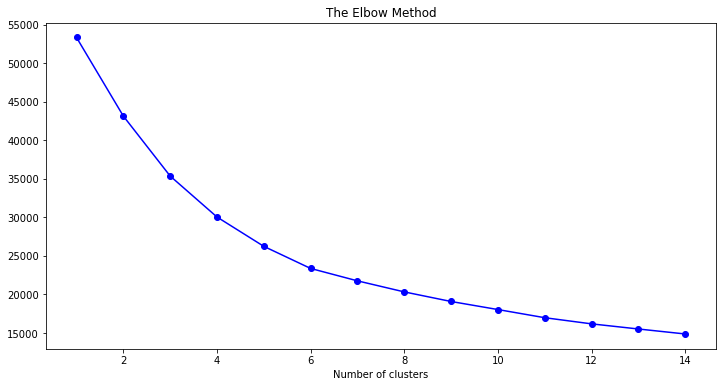

In [165]:
## Elbow plot
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the Elbow plot we can see that at K=3 the inertia starts to drop significantly. The clusters are labeled as 0,1,2

#### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot

In [166]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(df_pca)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [167]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 2, 1, ..., 2, 1, 1], dtype=int32)

In [168]:
## Creating a new dataframe only for labels and converting it into categorical variables.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,1
1,2
2,1
3,1
4,2


In [169]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [170]:
df_labels['Labels'] = df_labels

In [171]:
df_labels['Labels']

0       1
1       2
2       1
3       1
4       2
       ..
5995    0
5996    1
5997    2
5998    1
5999    1
Name: Labels, Length: 6000, dtype: int64

In [172]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df_copy2.join(df_labels)

df_kmeans.head(6000)

,bust size,weight,rating,height,size,age,large,small,date,everyday,...,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest,Labels
0,34.0,137.000000,10.0,68.0,14.0,28.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34.0,132.000000,10.0,66.0,12.0,36.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0.0,115.997751,10.0,64.0,4.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34.0,135.000000,8.0,65.0,8.0,34.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,34.0,145.000000,10.0,69.0,12.0,27.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,36.0,135.000000,10.0,63.0,14.0,31.000000,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5996,34.0,128.000000,8.0,64.0,8.0,41.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5997,38.0,150.000000,10.0,70.0,17.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5998,36.0,155.000000,8.0,66.0,16.0,26.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
df_kmeans['Labels'].value_counts()

1    3681
2    1555
0     764
Name: Labels, dtype: int64

#### c. Compute silhoutte score for evaluating the quality of the Kmeans clustering technique

In [174]:
from sklearn.metrics import silhouette_score #keep it

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_pca)
    labels = kmeans.predict(df_pca)
    print(i,silhouette_score(df_pca,labels))

2 0.2172776365880349
3 0.2543648980413884
4 0.22459820347564444
5 0.2374690523387006
6 0.24429864393061068
7 0.23198327019705156
8 0.233131731033091
9 0.2350657589283738
10 0.23652484358611514
11 0.234976129848624
12 0.2357769202492406
13 0.2303746651160248
14 0.24837856651164997


- From above, we can observe that for 3 clusters the silhoutte score is highest, we can choose optimal clusters as K=3

#### Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data

- Creating the Dendogram. We use dendrogram to find how many classes we have in our data set.

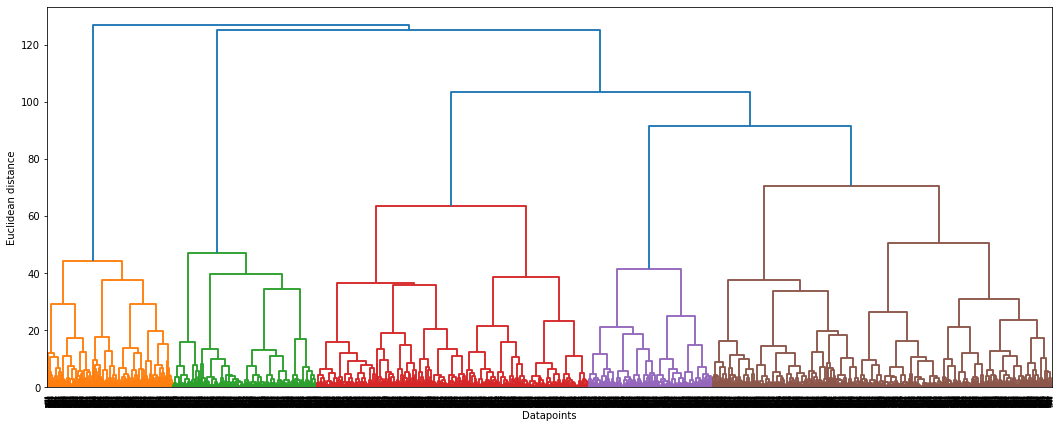

In [196]:
plt.figure(figsize=[18,7])
merg = linkage(df_pca, method='ward')
dendrogram(merg, leaf_rotation=90,)
x = dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

- We can observe that there are 5 classes from the dendogram

#### Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

In [187]:
hie_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(df_pca)

In [188]:
hie_cluster_model.labels_

array([1, 0, 1, ..., 2, 1, 1])

In [189]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,1
3,0
4,0


In [190]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_hier = df_copy3.join(df_label1)

df_hier.head(6000)

,bust size,weight,rating,height,size,age,large,small,date,everyday,...,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest,Labels
0,34.0,137.000000,10.0,68.0,14.0,28.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34.0,132.000000,10.0,66.0,12.0,36.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,115.997751,10.0,64.0,4.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34.0,135.000000,8.0,65.0,8.0,34.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.0,145.000000,10.0,69.0,12.0,27.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,36.0,135.000000,10.0,63.0,14.0,31.000000,0,0,0,1,...,0,0,1,0,0,0,0,0,0,3
5996,34.0,128.000000,8.0,64.0,8.0,41.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,38.0,150.000000,10.0,70.0,17.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5998,36.0,155.000000,8.0,66.0,16.0,26.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [191]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_hier.head()

,bust size,weight,rating,height,size,age,large,small,date,everyday,...,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest,Labels
0,34.0,137.000000,10.0,68.0,14.0,28.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34.0,132.000000,10.0,66.0,12.0,36.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,115.997751,10.0,64.0,4.0,33.856703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34.0,135.000000,8.0,65.0,8.0,34.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.0,145.000000,10.0,69.0,12.0,27.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Compute silhoutte score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [198]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_pca)
    labels = hier.fit_predict(df_pca)
    print(i,silhouette_score(df_pca,labels))

2 0.25639544032607847
3 0.24014417888900896
4 0.20543340502865176
5 0.21263570657436745
6 0.20828366778005244
7 0.21372133751876923
8 0.20610157742913995
9 0.20577425910152386
10 0.20439607392463804
11 0.20012136781513593
12 0.2012915234924156
13 0.20989876699846968
14 0.21269640391890615


- From above, we can observe that the silhouette score is high for 2 and 3 clusters

### Comparing the K-Means and Hierarchical Clustered labels.

- for Visualization we only using combination of two features and pass 'Lables' in the hue parameter

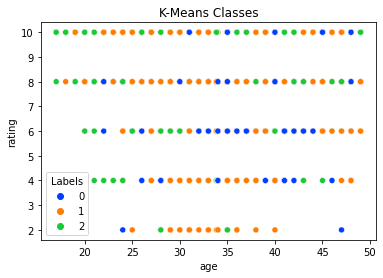

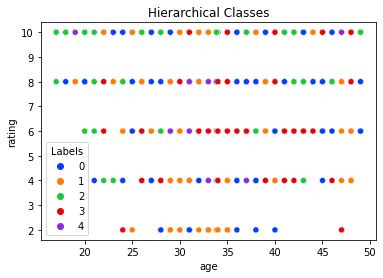

In [193]:
plt.title('K-Means Classes')
sns.scatterplot(x='age',y='rating',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='age',y='rating',hue='Labels',data=df_hier,palette='bright')
plt.show()

- It seems that K-Means clustering gives a better representation of clustering than Hierarchical clustering

# Conclusion

# 5. Perform cluster analysis by doing bivariate analysis between cluster label and different features and write your conclusion on the results.

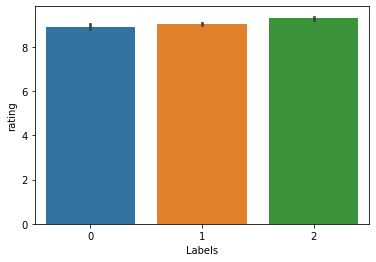

In [194]:
sns.barplot(df_kmeans['Labels'],df_kmeans['rating'])
plt.show()

- Most of the ratings greater than 8 are given by customers who fall under cluster 2

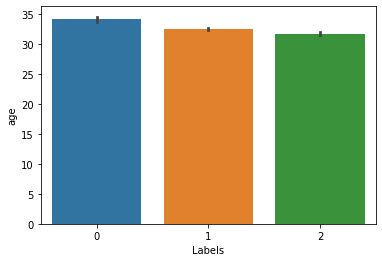

In [195]:
sns.barplot(df_kmeans['Labels'],df_kmeans['age'])
plt.show()

- People between the age group 30-35 who rent clothes fall under cluster 0